## Исследование данных о российском кинопрокате



**Прежде чем начать работу хочу описать вкратце поставленные передо мною задачи:**
- изучить общую информацию о датафреймах(размер, явные дубликаты, пропуски, ненулевые значения)
- объединить таблицы в один датафрейм.
- добавить новые столбцы: "year" - год выхода фильма, "main_genre" - основной жанр, "main_director" - главный режисер
- произвести предобработку(избавиться от пропусков, там где это возможно, убрать неявные дубликаты, изучить столбцы, которые содержат категориальные значения)
- провести исследовательский анализ данных, а именно: изучить динамику выхода фильмов в прокат, и выявить в какие года были максимальная и минимальная сумма сборов, изучить медианное и среднее значения суммы сборов. В период 2015-2019 г. рассмотреть какое возрастное ограничение оказалось наименее и наиболее кассовым.
- исследование фильмов, получавших господдержку:
- рассчитать общие средства на поддержку кино, выделяемые государством и сколько за счет этого было выпущено фильмов.
- выявить фильм с наилучшей окупаемостью.
- выявить фильм с наихудшей окупаемостью.
- Рассчитать средний рейтинг фильмов с государственной поддержкой и изучить его зависимость от госинвестиций.
- сравнить показатели (рейтинг и кассовые сборы) с фильмами без господдержки.
- предоставление общих выводов.

***Описание данных.
Таблица содержит следующую информацию.***
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

<span style="color:blue">***Так как имеем две таблицы, то хочу написать функцию для получения информации о таблице.***</span>

In [1]:
def data_show(dat):
    try:
        print('Первые 5 строк:')
        display(dat.head())
        print('Описание данных:')
        display(dat.describe())
        print('Общая информация о данных:')
        display(dat.info())
        print('Размер изначального датасета:', dat.shape)
        print('Количество пропусков')
        display(dat.isna().sum())
        print('Дубликаты:', dat.duplicated().sum())
    except:
        return "Ничего не получилось"

In [2]:
# прочиттаем оба файла и зафиксируем их за переменными data_movies и data_shows
import pandas as pd
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')  

In [3]:
#вызовем функцию для первого даттасета и изучим основную информацию
data_show(data_movies)

Первые 5 строк:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Описание данных:


,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 n

None

Размер изначального датасета: (7486, 15)
Количество пропусков


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

Дубликаты: 0


In [4]:
#сделаем то же самое для второго
data_show(data_shows)

Первые 5 строк:


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Описание данных:


,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

Размер изначального датасета: (3158, 2)
Количество пропусков


puNumber      0
box_office    0
dtype: int64

Дубликаты: 0


<span style="color:blue">***И так мы изучили таблицы. Нужно привести дату в порядок. Изменить тип данных у рейтинга. И поработать с пропущенными значениями. Очевидно что объединять таблицы нужно по столбцу puNumber — номер прокатного удостоверения. Но в таблице data_movies данный столбец имеет тип object. Поэтому прежде, чем объединять проверим какие есть в столбце puNumber значения не оносящиеся к типу данных integer. Исправим их и уже после этого объединим.***</span>

In [5]:
data_movies[~data_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:blue">***В строке №804 скорее всего есть пробел. Конечно бывает что вместо 0 пишут букву О, но здесь явно стоят нули, поэтому воспользуюсь методом strip(), чтобы удалить пробелы.
    В строке №1797 поменяю "нет" на 0. Так как это всего лишь порядковый номер значение 0 на сттатистику данных влиять не будет.***</span>

In [6]:
data_movies.loc[804, 'puNumber'] = data_movies.loc[804, 'puNumber'].strip()
data_movies.loc[1797, 'puNumber'] = 0
data_movies['puNumber']= pd.to_numeric(data_movies['puNumber'])

In [7]:
try:
    data_movies[~data_movies['puNumber'].str.isdigit()]
except:
    print('Нечисловые данные отсутствуют')
    

Нечисловые данные отсутствуют


In [8]:
print(data_movies['puNumber'].dtype)
print(data_shows['puNumber'].dtype)

int64
int64


<span style="color:blue">***Теперь столбец 'puNumber' в таблице data_movies имеет тип integer. Можно объединить таблицы.***</span>

In [9]:
data = data_movies.merge(data_shows, on = 'puNumber', how = 'left')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<span style="color:blue">***Как мы видим количество строк осталось такое же как и в исходных датафреймах, значит все строки успешно перенеслись. Таблицы объединины.***</span>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

<span style="color:blue">***Для начала рассмотрим столбец ratings. Сутя по таблице данные в нем варьируются от 0 до 10, но почему-то тип значений в нем object. Нужно посмотреть те строки, в которых помимо цифр содержаться другие символы.***</span>

In [11]:
data[data['ratings'].str.contains('[^0-9.]').fillna(False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29T12:00:00.000Z,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13T12:00:00.000Z,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27T12:00:00.000Z,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02T12:00:00.000Z,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


<span style="color:blue">***Мы видим что в ряде строк рейтинг указан не в формате десятичной дроби а в процентах.Нужно от этого избавиться. Еще пустые значения заменим на 0. Пустые значения у фильмов возникают либо потому что фильм только вышел либо потому что он не популярен и его никто не оценивает.***</span>

In [12]:
data['ratings'] = data['ratings'].str.replace('%', '')

In [13]:
data['ratings'] = data['ratings'].astype('float')

In [14]:
data['ratings'] = data['ratings'].apply(lambda x: x/10 if x>=10 else x)

<span style="color:blue">***Теперь в столбце show_start_date приведем дату и время в порядок.***</span>

In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

<span style="color:blue">***Рассмотрим пропуски в датафрейме***</span>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [17]:
data_isna = data.isna()
data_isna.sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<span style="color:blue">***В датафрейме всего 7486 строк. А в некоторых столбцах по 7127 пропусков. Давайте рассмотрим процент пропусков в датафрейме***</span>

In [18]:
pd.DataFrame(round(data.isna().mean()*100,1))

,0
title,0.0
puNumber,0.0
show_start_date,0.0
type,0.0
film_studio,0.2
production_country,0.0
director,0.1
producer,7.6
age_restriction,0.0
refundable_support,95.6


In [19]:
data_isna['year'] = data['show_start_date'].dt.year
data_isna.groupby(by='year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


<span style="color:blue">***Пустые значения в категориальных столбцах можно заменить на значение ".... неизвестно(-ен)"***</span>

In [20]:
data['film_studio'] = data['film_studio'].fillna(value='Студия неизвестна')
data['production_country'] = data['production_country'].fillna(value='Страна неизвестна')
data['director'] = data['director'].fillna(value='Режисер неизвестен')
data['producer'] = data['producer'].fillna(value='Продюссер неизвестен')
data['genres'] = data['genres'].fillna(value='Жанр неизвестен')

<span style="color:blue">***Данные по гос поддержке не указаны как для возвратных так и невозвратных инвестиций, то есть либо данных не было либо гос поддержка отсутствовала. Столбец budget показывает объём государственной поддержки и данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. А пропущенные в нем значения тоже заменим на 0. В столбце сборы есть пропущенные значения, они связаны либо с отсутствием данных либо в связи с тем, что фильм только недавно вышел в прокат.***</span>

In [21]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)
data['budget'] = data['budget'].fillna(value=0)
data['box_office'] = data['box_office'].fillna(value=0)

In [22]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7154
ratings                   967
genres                      0
box_office                  0
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [23]:
data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        951
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    743
box_office               2938
dtype: int64

In [24]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.0,"мелодрама,комедия",0.0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.6,"драма,мелодрама,история",0.0
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.4,"комедия,криминал",0.0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,6.8,"комедия,криминал",0.0


<span style="color:blue">***Номер прокатного удостоверения фильмов Анализируй это! и Анализируй то! лучше сделать разными. Фильмы вышли в одно и то же время. Возможно это один и тот же фильм просто в разных местах называются по разному. У них отличаются только возрастные ограничения, вероятно это связано с регионом показа(страны, области, республики). Поэтому присвою фильму Анализируй это! рейтинг 100000001. Аналогично поступлю с фильмом Как жениться и остаться холостым и присвою номер 100000002***</span>

In [25]:
data.loc[(data['title'] == 'Анализируй это!') & (data['puNumber'] == '221054410'), 'puNumber'] = 100000001

In [26]:
data.loc[(data['title'] == 'Как жениться и остаться холостым') & (data['puNumber'] == 
                                                                  '221154310'), 'puNumber'] = 100000002

In [27]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

<span style="color:blue">***В некоторых случаях у фильмов есть несколько стран производителей и они перечислены разным способом(через тире либо через запятую). Заменим тире на запятую.***</span>

In [28]:
data['production_country'] = data['production_country'].dropna().apply(lambda x: ', '
                                                                       .join([x.strip() for x in x.split('-')]))

<span style="color:blue">***Посмотрим могли ли фильмы задублироваться по названиям, дате премьеры, типа, студии-производителя, страны-производителя и режисера.***</span>

In [29]:
data[data.duplicated(subset=['title', 'show_start_date', 'type', 
                             'film_studio', 'production_country', 'director'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...","Испания, Франция","Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.2,"драма,фантастика,триллер",0.0
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...","Испания, Франция","Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.2,"драма,фантастика,триллер",0.0
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,3.5,"комедия,приключения",0.0
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,3.5,"комедия,приключения",0.0
2191,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.7,"мюзикл,драма,мелодрама",0.0
2192,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.7,"мюзикл,драма,мелодрама",52495.0
2752,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...","Южная Корея, КНР",Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,5.2,"мультфильм,семейный,спорт",1360.0
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...","Южная Корея, КНР",Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,5.2,"мультфильм,семейный,спорт",14152495.9
3086,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.7,драма,0.0
3087,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.7,драма,332371.0


<span style="color:blue">***Обнаружили 8 повторяющихся фильмов, у которых оттличаются номера прокатных удостоверений. Я их оставлю потому что скорее всего они вышли под разными прокатными удостоверениями из-за какой-либо бюрократии. Да и информация по бюджету, возвратным и невозвартным гос инвестициям в них отсутствует, что в дальнейшем не повлияет на исследования о фильмах получившим господдержку.***</span>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [30]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

<span style="color:blue">***Для того чтобы здесь избавиться от дубликатов удалим пробелы.***</span>

In [31]:
data['type'] = data['type'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

<span style="color:blue">***В столбце budget есть данные только тех фильмов, которые имеют гос поддержку. Рассмотрим как соотносится бюджет к возвратным и невозвратным гос инвестициям(refundable_support и nonrefundable_support соответсттвенно).***</span>

In [32]:
data.query('refundable_support > 0 and nonrefundable_support > 0 and budget > 0 and box_office == 0' )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",0.0
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",0.0


<span style="color:blue">***Фильмы с господдержкой но без сборов есть, однако дата выхода в конце 19 года и скорее всего данные о сборах еще не появились.
Теперь проверим фильмы с бюджетом меньше суммы суммарной господдержки. Сохраним в переменную data_low_budget.***</span>

In [33]:
data_low_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
data_low_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


<span style="color:blue">***Оценим долю государственного бюджета фильма***</span>

In [34]:
data_share_support = ((data['refundable_support'] +
                       data['nonrefundable_support']) / data['budget']).median()*100
print('Доля государственного бюджета фильма составляет:', round(data_share_support, 2), '%')


Доля государственного бюджета фильма составляет: 61.4 %


<span style="color:blue">***Заполним пропуски в бюджете суммой господдержки разделенную на долю государственного бюджета фильма.***</span>

In [35]:
data.loc[data_low_budget.index, 'budget'] = (data.loc[data_low_budget.index, 'refundable_support'] + data.loc[data_low_budget.index, 'nonrefundable_support']) / (data_share_support/100)
data.loc[data_low_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.745699e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.221424e+08,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.302852e+08,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.257129e+07,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.605704e+08,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.608532e+07,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.699976e+07,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,9.771388e+06,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.139995e+08,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.071412e+08,Фонд кино,5.6,фантастика,1.038321e+09


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [37]:
def get_first(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].str.split(',').str[0]
    return data

In [38]:
data = get_first(data, ['genres', 'director'])

In [39]:
data['main_genres'].value_counts().head()

драма              1688
Жанр неизвестен     976
комедия             697
боевик              617
ужасы               573
Name: main_genres, dtype: int64

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.


In [40]:
print('Доля государственного бюджета фильма составляет:'
      , round(((data['refundable_support'] + 
                data['nonrefundable_support']) / data['budget']).median()*100), '%')

Доля государственного бюджета фильма составляет: 61 %


<span style="color:blue">***Наиболее популярные основные жанры оказались:***
- драма 1688 фильмов
- комедия 697 фильмов
- боевик 617 фильмов
- ужасы 573 фильмов </span>
<span style="color:blue">***Доля государственного бюджета фильма составляет: 61 %. На мой взгляд это крайне много, так как это способствует демотивации ряда режисеров к съемке качественного кино.***</span>


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [41]:
data_pivot = data.query('box_office > 0').pivot_table(index='year', values='box_office', 
                        aggfunc=['count', 'sum', 'mean', 'median'])
data_pivot = data_pivot.set_axis(['В прокате', 'Сумма', 'Среднее', 'Медиана'], axis='columns')
data_pivot['Фильмов в год'] = data.pivot_table(index='year', 
                                               values='box_office', aggfunc='count')['box_office']
data_pivot['Процент проката'] = data_pivot['В прокате'] / data_pivot['Фильмов в год']  * 100
display(data_pivot.loc[:, ['В прокате', 'Фильмов в год', 'Процент проката']])

,В прокате,Фильмов в год,Процент проката
year,,,
2010,101,985,10.253807
2011,109,622,17.524116
2012,123,593,20.741990
2013,179,630,28.412698
2014,273,807,33.828996
2015,462,705,65.531915
2016,525,818,64.180929
2017,357,505,70.693069
2018,475,891,53.310887


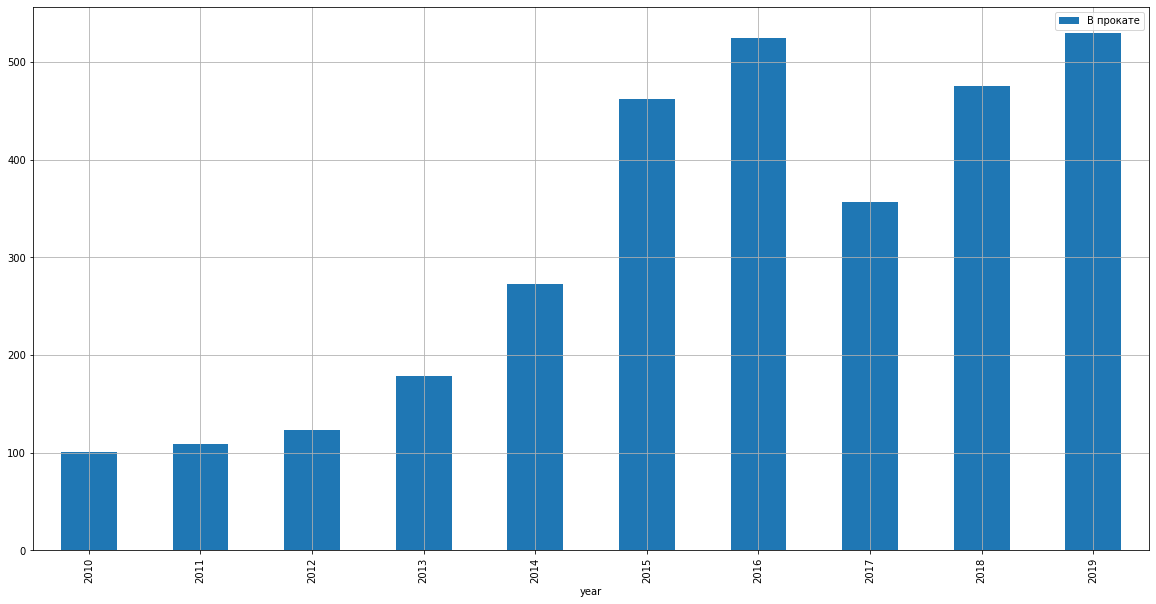

In [42]:
data_pivot.plot(kind='bar', y='В прокате', figsize=(20, 10), grid=True, alpha=1);

<span style="color:blue">***Ну чтож, количество фильмов в прокате в целом растет, однако после 2016 года произошел спад, однако после 17 года снова пошел планомерный рост. В 2019 году количество фильмов в прокате вернулось к значению 2016 года.***</span>

In [43]:
print('Доля фильмов с информацией о прокате в кинотеатре составляет :',
        round(data.query('box_office > 0')['box_office'].notna().count() / data['box_office'].count() * 100, 2),'%')

Доля фильмов с информацией о прокате в кинотеатре составляет : 41.86 %


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

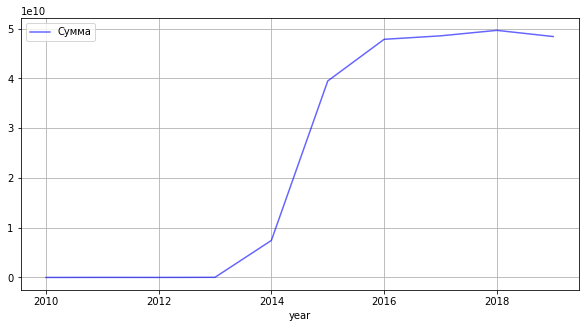

In [44]:
data_pivot.plot(kind='line', y='Сумма', figsize=(10, 5), grid=True, color='blue', alpha=0.6);

In [45]:
print('Максимальная сумма сборов была в:',data_pivot['Сумма'].idxmax(),"году", "и составляет",
      round(data_pivot['Сумма'].max()/1000000000, 2),"миллиардов рублей")
print('Минимальная сумма сборов была в:',data_pivot['Сумма'].idxmin(),"году",
      "и составляет", round(data_pivot['Сумма'].min(), 2),"рублей")


Максимальная сумма сборов была в: 2018 году и составляет 49.67 миллиардов рублей
Минимальная сумма сборов была в: 2010 году и составляет 2428654.0 рублей


<span style="color:blue">***Мы видим планомерный рост выручки за прокат, в 2019 показано небольшое падение, однако делать вывод о 2019 годе некорректно, в связи с тем, что вероятно не все данные по сборам, так как есть недавно вышедшие на экран фильмы.***</span>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [46]:
data_pivot.loc[:, ['Среднее', 'Медиана']]

,Среднее,Медиана
year,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


<AxesSubplot:title={'center':'График Среднее и Медиана'}, xlabel='year'>

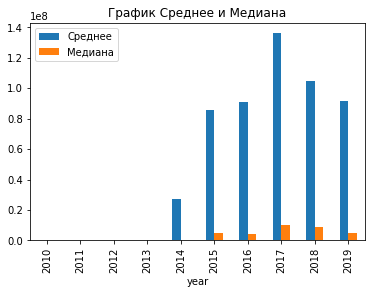

In [47]:
data_pivot[['Среднее', 'Медиана']].plot(kind='bar', title='График Среднее и Медиана')

<span style="color:blue">***Медианное и среднее значения растут до 2017 года, а затем происходит планомерное падение, видимо это связано со снижением количества выхода фильмов в прокат, которое происходило с 2016***</span>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

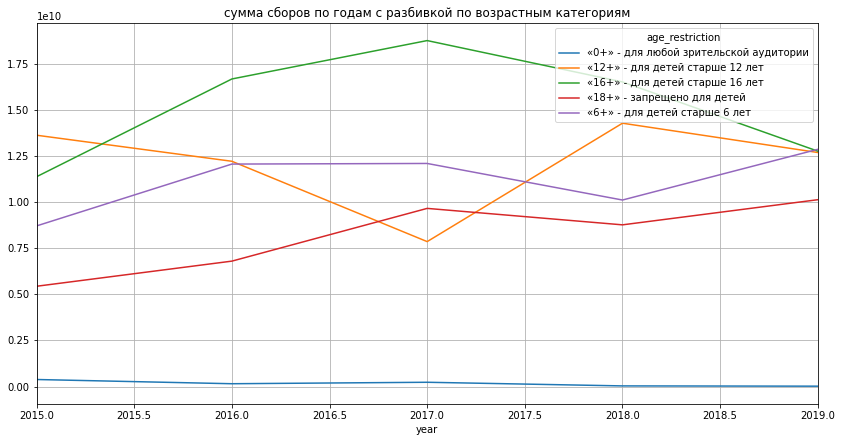

In [48]:
data[data['box_office'].notna()].pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum').plot(title='сумма сборов по годам с разбивкой по возрастным категориям',
                                    kind='line',figsize=(14, 7), grid = True, xlim=[2015, 2019]);


In [49]:
revenue_by_year_rating = data.groupby(['year', 'age_restriction'])['box_office'].sum().unstack()
max_revenue_rating = revenue_by_year_rating.sum().idxmax()
min_revenue_rating = revenue_by_year_rating.sum().idxmin()
max_revenue_amount = round(revenue_by_year_rating.sum().max())
min_revenue_amount = round(revenue_by_year_rating.sum().min())
print("Возрастное ограничение с наибольшими сборами: ", max_revenue_rating)
print(f"Суммарные сборы по этому возрастному ограничению: {max_revenue_amount}", ' рублей')
print("Возрастное ограничение с наименьшими сборами: ", min_revenue_rating)
print(f"Суммарные сборы по этому возрастному ограничению: {min_revenue_amount}", ' рублей')

Возрастное ограничение с наибольшими сборами:  «16+» - для детей старше 16 лет
Суммарные сборы по этому возрастному ограничению: 76583674041  рублей
Возрастное ограничение с наименьшими сборами:  «0+» - для любой зрительской аудитории
Суммарные сборы по этому возрастному ограничению: 1205003952  рублей


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [50]:
data['government_support'] = (data['refundable_support'] + data['nonrefundable_support'])

In [51]:
total_support_budget = data[data['government_support'].notna()]['budget']
print("Общие средства на поддержку кино: ", round(total_support_budget.sum() / 1000000000, 2), "миллиардов рублей")


Общие средства на поддержку кино:  44.51 миллиардов рублей


In [52]:
data['ROI'] = (data['box_office'] - data['budget']) / data['budget']
best_roi_film = data.loc[data['ROI'].idxmax()]
print("Фильм с наилучшей окупаемостью: ", best_roi_film['title'])
worst_roi_film = data.loc[data['ROI'].idxmin()]
print("Фильм с худшей окупаемостью: ", worst_roi_film['title'])

Фильм с наилучшей окупаемостью:  Любовь и голуби
Фильм с худшей окупаемостью:  Золотая рыбка (2015)


In [53]:
average_rating = data[data['government_support'].notna()]['ratings'].mean()
print("Средний рейтинг фильмов с государственной поддержкой: ", round(average_rating, 2))

Средний рейтинг фильмов с государственной поддержкой:  6.49


<span style="color:blue">***Рассмотрим медиану по выделяемому бюджету на фильм***</span>

In [54]:
median_allocated_budget = data.query('budget != 0')['budget'].median()
print('Медиана по выделяемому бюджету на фильм: ', median_allocated_budget,'рублей')

Медиана по выделяемому бюджету на фильм:  74592550.0 рублей


Корреляция составляет зависимости рейтинга фильма от господдержки:                      government_support   ratings
government_support            1.000000 -0.040316
ratings                      -0.040316  1.000000


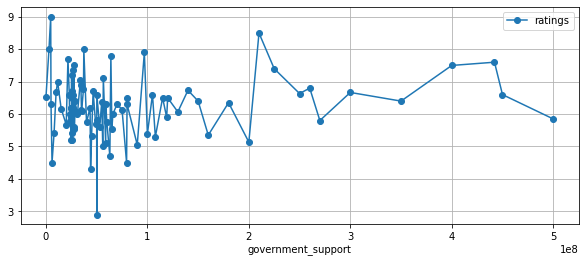

In [55]:
data.pivot_table(index = 'government_support', 
                 values = 'ratings',).plot(style = 'o-', grid = True, figsize = (10,4))
print('Корреляция составляет зависимости рейтинга фильма от господдержки: '
      , data.pivot_table(index = 'title', values = ['government_support', 'ratings']).corr())

<span style="color:blue">***Мы можем сделать вывод о том, что большая господдержка не гарантирует успех фильма. Корреляция доказывает, что рейтинг не зависит от суммы господдержки.***</span>

    У нас предоставлено три варианта госфинансирования:
    -Фонд кино
    -Министерство культуры
    -Фонд кино и Министерство культуры
    Посмотрим сколько фильмов было ими снято с и без информацией о сборах.


In [56]:
sponsors = ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
supported_movies_with_data =data.query('budget != 0 and box_office == 0 and financing_source in @sponsors'
                                      )['title'].count()
display('Фильмы снятые при поддержке Мин культа или Фонда кино без информации о сборах', supported_movies_with_data)
supported_movies_without_data = data.query('budget != 0 and box_office != 0 and financing_source in @sponsors'
                                          )['title'].count()
display('Фильмы снятые при поддержке Мин культа или Фонда кино с информацией о сборах',
        supported_movies_without_data)

'Фильмы снятые при поддержке Мин культа или Фонда кино без информации о сборах'

14

'Фильмы снятые при поддержке Мин культа или Фонда кино с информацией о сборах'

318

<span style="color:blue">***Последняя дата о фильмах в файле является 30 декабря 2019 года. В открытых источниках есть много информации о том, сколько фильм обычно находится в прокате. Но ту информацию, что я нашел варьируется от 2 до 10 недель. Давайте примем 6 недель, то есть 1,5 месяца. Допустим, что данные о сборах появляются спустя 1,5 месяца после выхода в прокат. Поэтому отбросим фильмы выходившие после 15 ноября.***</span>

In [57]:
data.query('budget != 0 and box_office == 0 and financing_source in @sponsors and show_start_date < "2019-11-15 12:00:00+00:00" ' )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_genres,main_director,government_support,ROI
2800,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.0,...,41998984.0,Министерство культуры,6.3,драма,0.0,2015,драма,А.Галибин,25000000.0,-1.0
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.0,...,61000000.0,Министерство культуры,5.2,мелодрама,0.0,2017,мелодрама,А.Сурикова,10000000.0,-1.0
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.0,...,18706080.0,Министерство культуры,7.0,"мультфильм,приключения,детектив",0.0,2016,мультфильм,А.Романец,11520000.0,-1.0
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,...,44600000.0,Министерство культуры,7.2,"детский,комедия",0.0,2017,детский,Е.Соколов,25000000.0,-1.0
6476,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.0,...,39700000.0,Министерство культуры,5.2,"драма,криминал",0.0,2019,драма,С.Черников,25000000.0,-1.0
6709,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,Продюссер неизвестен,«12+» - для детей старше 12 лет,0.0,...,46941140.0,Министерство культуры,6.1,"драма,военный,история",0.0,2019,драма,А.Золотухин,30000000.0,-1.0
6968,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.0,...,61571449.0,Министерство культуры,5.8,"драма,история,биография",0.0,2019,драма,Ю.Разыков,40000000.0,-1.0
7009,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс","Россия, Грузия",П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.0,...,60668576.0,Министерство культуры,4.9,"драма,криминал,детектив",0.0,2019,драма,П.Левченко,25000000.0,-1.0
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,...,33000000.0,Министерство культуры,8.0,семейный,0.0,2019,семейный,А.Попова,3000000.0,-1.0
7229,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.0,...,57876000.0,Министерство культуры,6.6,"приключения,триллер",0.0,2019,приключения,Е.Михалков-Кончаловский,35000000.0,-1.0


<span style="color:blue">***В этом списке фильмы разных лет и получившие разный рейтинг. Какой-то закономерности я не вижу, скорее всего данные просто не внесли.***</span>

In [58]:
films_less_median_allocated_budget = data.query(
    'budget != 0 and box_office < @median_allocated_budget and financing_source in @sponsors'
)['box_office'].sort_values(ascending=True).nunique()
print(films_less_median_allocated_budget, "фильм собрал меньше выделяемого бюджета")
print('Что составляет', round((
    films_less_median_allocated_budget/(supported_movies_with_data + supported_movies_without_data
                                       ))*100, 2), 
      '%, от общего количество фильмов снятых Минкультом и Фондом кино')

221 фильм собрал меньше выделяемого бюджета
Что составляет 66.57 %, от общего количество фильмов снятых Минкультом и Фондом кино


<span style="color:blue">***Эти данные внушают мало позитива относительно фильмов с государственной поддрежкой в России. Давайте теперь рассмотрим и сравним рейтинги и сборы фильмов с поддержкой и без, при этом разобьем их на жанры.***</span>

In [59]:
data_raitings_russia_pivot = (data.query('financing_source not in @sponsors and production_country == "Россия"')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_russia_pivot = data_raitings_russia_pivot.reindex(['ratings', 'box_office'], axis=1)
data_raitings_russia_pivot = data_raitings_russia_pivot.set_axis(
    ['Рейтинг фильмов без спонсирования. Россия', 'Средние сборы без спонсирования. Россия'], axis='columns')

data_raitings_russia_gs_pivot = (data.query(
    'budget != 0 and box_office != 0 and financing_source in @sponsors and production_country == "Россия"')
                    .pivot_table(index='main_genres', values=['ratings', 'box_office'], aggfunc= 'mean')
                    .sort_values(by='main_genres', ascending = True))
data_raitings_russia_gs_pivot = data_raitings_russia_gs_pivot.reindex(
    ['ratings', 'box_office'], axis=1)
data_raitings_russia_gs_pivot = data_raitings_russia_gs_pivot.set_axis(
    ['Рейтинг фильмов со спонсированием. Россия', 'Средние сборы со спонсированием. Россия'], axis='columns')

data_raitings_russia_merge = data_raitings_russia_pivot.merge(
    data_raitings_russia_gs_pivot, on='main_genres', how='right')
data_raitings_russia_merge = data_raitings_russia_merge.reindex(
    ['Рейтинг фильмов без спонсирования. Россия', 'Рейтинг фильмов со спонсированием. Россия', 
     'Средние сборы без спонсирования. Россия', 'Средние сборы со спонсированием. Россия'], axis=1)

def highlight_cells(x, alpha=1.0):
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    df_color.loc[x['Рейтинг фильмов без спонсирования. Россия'] 
                 > x['Рейтинг фильмов со спонсированием. Россия'],
                 ['Рейтинг фильмов без спонсирования. Россия']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Рейтинг фильмов со спонсированием. Россия'] 
                 > x['Рейтинг фильмов без спонсирования. Россия'], 
                 ['Рейтинг фильмов со спонсированием. Россия']] = f'background-color: rgba(143, 188, 143, {alpha})'
    
    df_color.loc[x['Средние сборы без спонсирования. Россия'] 
                 > x['Средние сборы со спонсированием. Россия'], 
                 ['Средние сборы без спонсирования. Россия']] = f'background-color: rgba(244, 164, 96, {alpha})'
    df_color.loc[x['Средние сборы со спонсированием. Россия'] 
                 > x['Средние сборы без спонсирования. Россия'], 
                 ['Средние сборы со спонсированием. Россия']] = f'background-color: rgba(143, 188, 143, {alpha})'
    return df_color

data_raitings_russia_merge.style.apply(highlight_cells, alpha=0.5, axis=None)

,Рейтинг фильмов без спонсирования. Россия,Рейтинг фильмов со спонсированием. Россия,Средние сборы без спонсирования. Россия,Средние сборы со спонсированием. Россия
main_genres,,,,
Жанр неизвестен,5.040000,nan,311767.097165,98783248.309333
биография,6.811111,6.600000,10056933.201111,57539287.870000
боевик,6.278947,6.440000,6679187.410526,57655658.052000
военный,6.284615,6.425000,22135996.551538,120745685.725000
детектив,6.323529,6.760000,53164252.274706,27709502.280000
детский,5.863636,7.100000,51384.727273,1004550.666667
драма,6.551613,6.477500,2393919.577312,117514032.109500
история,5.890000,5.350000,12497392.999000,363867058.642500
комедия,5.593143,5.545833,35499778.839886,173322743.282361


<span style="color:blue">Что касается рейтингов тот результаты примерно равны. У фильмов без господдержки рейтинг выше фильмов с господдержкой в 10 из 19 случаев. Самыми яркими примерами по превосходству в рейтинге фильмов без господдержки являются фильмы жанра:
- мюзикл 7.833333 против 6.55
- семейные 6.084615 против 4.983333
- триллер 6.441791 против 5.671429
- ужасы 5.816216 против 5.2
А рейтинги фильмов с госсподдержкой значительно превосходят фильмы без господдержки в следующих жанрах:
- криминал 7,5 против 6.483333
- детский 7,1 против 5.863636**</span>
<span style="color:blue">**Но ситуация по сборам явно в пользу фильмов с господдержкой, они уступают только в жанре детектив. Что в принципе логично, госфильмы имеют доступ к большиму числу кинотеатров, телеканалов, селебрити, которые могут продвигать фильмы, соответственно и сборы будут выше.</span>

### Шаг 5. Напишите общий вывод

    В начале проекта я обьединил два датафрейма, заранее изменив параметра объединяющего столбца. В последствии были внесены коррективы в датафрейм(убрал дубликаты, изменил тип данных, заполнил пропуски), которые упростили дальнейшее иследование.
    В нашем исследовании рассматривался период кинопроката с 2010 по 2019 года. С 2010 по 2016 наблюдался планомерный рост прокат, однако в 2017 обнаружился резкий спад, видимо после девальвации рубля и усложнение бюрократии(получение господдержки, различных лицензий и т.п.), которые повлияли на удорожание производства и затягивании в выпуске фильмов на большие экраны. Однако потом снова наблюдался рост проката, который позволил в 2019 году вернуться к результатам 2019 года. Выручка показывает планомерный рост. Максимальная сумма сборов была в 2018 году и составляет 49.67 миллиардов рублей. Минимальная сумма сборов была в 2010 году и составляет 2428654 рубля.
    Теперь поговорим о возрастных ограничениях. Возрастное ограничение с наибольшими сборами:  для детей старше 16 лет суммарные сборы по этому возрастному ограничению: 76583674041 рублей, что в принципе и ожидаемо, так как фильмы с таким ограничением привлекают более возрастную категорию зрителей которая является наиболее платежеспособная. Возрастное ограничение с наименьшими сборами:  «0+» - для любой зрительской аудитории. Суммарные сборы по этому возрастному ограничению: 1205003952 рублей. Скорее всего это детские фильмы и мультики на которые наврятли часто ходят взрослые, а на детях много денег не соберешь.
    Что касается фильмов с господдержкой, то получили следующие данные:
    -Общие средства на поддержку кино, выделяемые государством составляют 44.51 миллиардов рублей.
    -Фильм с наилучшей окупаемостью:  Любовь и голуби
    -Фильм с худшей окупаемостью:  Золотая рыбка (2015)
    -Средний рейтинг фильмов с государственной поддержкой:  6.49
    Построил график зависимости рейтинга фильма от выделяемых государством средств. График и коэффициент корреляции(-0.040316) показали, что размер выделяемых средств не влияет на итоговую реакцию зрителей на фильм.
    Всего за период 2010-2019 г. с помощью государства было произведено 332 фильма из которых 221 по итогу получил меньше кассовых сборов, чем ранее выделялось на производство, что составляет 66,57%.
    Затем сравнил рейтинговые и финансовые успехи фильмов снятых с и без господдержки и получил следующие результаты:
    - по рейтингам получился примерно равный результат у небюджетных фильмов превосходство в 10 жанрах из 19 над фильмами с господдержкой.
    -Самыми яркими примерами по превосходству в рейтинге фильмов без господдержки являются фильмы жанра:
        -мюзикл 7.833333 против 6.55
        - семейные 6.084615 против 4.983333
        - триллер 6.441791 против 5.671429
        - ужасы 5.816216 против 5.2
    А рейтинги фильмов с госсподдержкой значительно превосходят фильмы без господдержки в следующих жанрах:
        - криминал 7,5 против 6.483333
        - детский 7,1 против 5.863636
    -Но ситуация по сборам явно в пользу фильмов с господдержкой, они уступают только в жанре детектив. Что в принципе логично, госфильмы имеют доступ к большиму числу кинотеатров, телеканалов, селебрити, которые могут продвигать фильмы, соответственно и сборы будут выше.